# Ch03 TF-IDF

**Question to answer:** Which words are more important to a particular document and across the corpus as a whole?

If you have an idea about the frequency with which those words appear in a document in relation to the rest of the documents, you can use that to further refine the “positivity” of the document.

之前，每个word vector 都是一个binary vector, 每一位都是0/1,表示absence / presence。下一步，用continuous number。

TF-IDF: term frequency times inverse document frequency
- Term Frequency: the number of times a word occurs in a given document
    - 有时需要normalize: divided by the number of tokens in the document
    - normalize 反映了 relative importance to the document of that term
- Inverse Document Frequency: divide each of those word counts by the number of documents in which the word occurs.

## 1. Bag of Words

Bag of word 是一种把document 转化成vector 的方法。
- bag of words (BOW) -- word:count pair
- binary bag of words (set of words) -- word:bool pair (1:presence/0:absence)

In [1]:
from nltk.tokenize import TreebankWordTokenizer

harry_sample_sentence = "The faster Harry got to the store, the faster Harry, the faster, would get home."
tokenizer = TreebankWordTokenizer()
harry_sample_tokens = tokenizer.tokenize(harry_sample_sentence.lower())
print(harry_sample_tokens)

['the', 'faster', 'harry', 'got', 'to', 'the', 'store', ',', 'the', 'faster', 'harry', ',', 'the', 'faster', ',', 'would', 'get', 'home', '.']


#### step 1: get unique words and word counts

我们使用Counter，是一个unordered collection, 也称为bag or multiset. 我们可以将一个list 传给Counter 来生成一个multiset.

In [2]:
from collections import Counter

harry_sample_bag_of_words = Counter(harry_sample_tokens)
harry_sample_bag_of_words

Counter({'the': 4,
         'faster': 3,
         'harry': 2,
         'got': 1,
         'to': 1,
         'store': 1,
         ',': 3,
         'would': 1,
         'get': 1,
         'home': 1,
         '.': 1})

In [3]:
harry_sample_bag_of_words.most_common(4)

[('the', 4), ('faster', 3), (',', 3), ('harry', 2)]

"the"和","没有什么information，所以可以忽略。我们通过剩余两个most common的tokens，基本可以看出这句话的意思。

#### step 2: 计算每个token 的TF

下面，我们计算harry 的TF. 

⚠️这里为什么是除以unique words 的个数，而不是document 的单词个数？这样除有可能大于1。

In [4]:
times_harry_appears = harry_sample_bag_of_words['harry']  # harry 计数
print('counter: {}'.format(times_harry_appears))

num_unique_words = len(harry_sample_bag_of_words)  # 
print('number of words: {}'.format(num_unique_words))

tf = times_harry_appears / num_unique_words
round(tf, 4)

counter: 2
number of words: 11


0.1818

### real example

下面我们来看一个real example. 我们选取了wikipedia 上有关kite 介绍的内容。

In [6]:
wikipedia_kite = """A kite is traditionally a tethered heavier-than-air craft with wing surfaces that react
against the air to create lift and drag. A kite consists of wings, tethers, and anchors.
Kites often have a bridle to guide the face of the kite at the correct angle so the wind
can lift it. A kite’s wing also may be so designed so a bridle is not needed; when
kiting a sailplane for launch, the tether meets the wing at a single point. A kite may
have fixed or moving anchors. Untraditionally in technical kiting, a kite consists of
tether-set-coupled wing sets; even in technical kiting, though, a wing in the system is
still often called the kite.
The lift that sustains the kite in flight is generated when air flows around the kite’s
surface, producing low pressure above and high pressure below the wings. The
interaction with the wind also generates horizontal drag along the direction of the
wind. The resultant force vector from the lift and drag force components is opposed
by the tension of one or more of the lines or tethers to which the kite is attached. The
anchor point of the kite line may be static or moving (such as the towing of a kite by
a running person, boat, free-falling anchors as in paragliders and fugitive parakites
or vehicle).
The same principles of fluid flow apply in liquids and kites are also used under water.
A hybrid tethered craft comprising both a lighter-than-air balloon as well as a kite
lifting surface is called a kytoon.
Kites have a long and varied history and many different types are flown
individually and at festivals worldwide. Kites may be flown for recreation, art or
other practical uses. Sport kites can be flown in aerial ballet, sometimes as part of a
competition. Power kites are multi-line steerable kites designed to generate large forces
which can be used to power activities such as kite surfing, kite landboarding, kite
fishing, kite buggying and a new trend snow kiting. Even Man-lifting kites have
been made."""

In [7]:
from collections import Counter
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

# case normalization
# tokenization
kite_intro_tokens = tokenizer.tokenize(wikipedia_kite.lower())

# multiset: bag of words
kite_intro_bag_of_words = Counter(kite_intro_tokens)

print('the number of unique tokens in kite introduction text: ', len(kite_intro_bag_of_words))
kite_intro_bag_of_words


the number of unique tokens in kite introduction text:  180


Counter({'a': 20,
         'kite': 16,
         'is': 7,
         'traditionally': 1,
         'tethered': 2,
         'heavier-than-air': 1,
         'craft': 2,
         'with': 2,
         'wing': 5,
         'surfaces': 1,
         'that': 2,
         'react': 1,
         'against': 1,
         'the': 26,
         'air': 2,
         'to': 5,
         'create': 1,
         'lift': 4,
         'and': 10,
         'drag.': 1,
         'consists': 2,
         'of': 10,
         'wings': 1,
         ',': 14,
         'tethers': 2,
         'anchors.': 2,
         'kites': 8,
         'often': 2,
         'have': 4,
         'bridle': 2,
         'guide': 1,
         'face': 1,
         'at': 3,
         'correct': 1,
         'angle': 1,
         'so': 3,
         'wind': 2,
         'can': 3,
         'it.': 1,
         '’': 2,
         's': 2,
         'also': 3,
         'may': 4,
         'be': 5,
         'designed': 2,
         'not': 1,
         'needed': 1,
         ';': 2,
    

下面，我们remove 所有的stop words

In [8]:
import nltk

# get list of stop words
stopwords = nltk.corpus.stopwords.words('english')

# remove stop words
kite_intro_tokens_wo_stopwords = [x for x in kite_intro_tokens if x not in stopwords]

kite_intro_bag_of_words_wo_stopwords = Counter(kite_intro_tokens_wo_stopwords)

print('the number of unique tokens in kite introduction text (without stop words): ', len(kite_intro_bag_of_words_wo_stopwords))

kite_intro_bag_of_words_wo_stopwords


the number of unique tokens in kite introduction text (without stop words):  146


Counter({'kite': 16,
         'traditionally': 1,
         'tethered': 2,
         'heavier-than-air': 1,
         'craft': 2,
         'wing': 5,
         'surfaces': 1,
         'react': 1,
         'air': 2,
         'create': 1,
         'lift': 4,
         'drag.': 1,
         'consists': 2,
         'wings': 1,
         ',': 14,
         'tethers': 2,
         'anchors.': 2,
         'kites': 8,
         'often': 2,
         'bridle': 2,
         'guide': 1,
         'face': 1,
         'correct': 1,
         'angle': 1,
         'wind': 2,
         'it.': 1,
         '’': 2,
         'also': 3,
         'may': 4,
         'designed': 2,
         'needed': 1,
         ';': 2,
         'kiting': 3,
         'sailplane': 1,
         'launch': 1,
         'tether': 1,
         'meets': 1,
         'single': 1,
         'point.': 1,
         'fixed': 1,
         'moving': 2,
         'untraditionally': 1,
         'technical': 2,
         'tether-set-coupled': 1,
         'sets': 1,


所以单看token 的计数，我们对文章的主题也是有一些理解的。例如，kite, wing, lift 这些词都很重要，都和kite 相关。如果corpus 中有很多有关kite 的文章，大概率的这些文章string, wind 这些单词的TF 都比较高。

## 2. Vectorizing

前面，我们计算了每个document 中每个token 的count。下面，我们对每个document 生成一个vector. vector 的长度为字典的大小。通常，对于一个document 的意思，我们通常取频率最高的K个单词即可，下面我们选取最常用的10个词来生成一个**计数占比**的vector.

In [13]:
document_vector = []

doc_length = len(kite_intro_tokens_wo_stopwords)
print('doc length: ', doc_length)
print('doc tokens: ', kite_intro_tokens_wo_stopwords[:10])

for key, value in kite_intro_bag_of_words_wo_stopwords.most_common(10):
    document_vector.append(value / doc_length)

document_vector

doc length:  220
doc tokens:  ['kite', 'traditionally', 'tethered', 'heavier-than-air', 'craft', 'wing', 'surfaces', 'react', 'air', 'create']


[0.07272727272727272,
 0.06363636363636363,
 0.03636363636363636,
 0.022727272727272728,
 0.01818181818181818,
 0.01818181818181818,
 0.013636363636363636,
 0.013636363636363636,
 0.013636363636363636,
 0.00909090909090909]

### 2.1 每个document 计算一个vector

如果需要对两个document 生成两个vector，然后进行数学操作，例如比较。我们需要这两个vector 在相同的空间内，即有相同的dimension。所以我们需要进行以下操作：
- normalize vector
- 每个vector 有相同的dimension(构建lexicon)

下面，我们用一个简单的例子，一个corpus 有3个documents，我们根据3个documents 构建一个lexicon(相当于vocabulary)，这个lexicon 的长度就是我们document vector 的纬度。

#### step 1: 构建corpus，包含三个documents

In [14]:
sample_docs = ["The faster Harry got to the store, the faster and faster Harry would get home."]
sample_docs.append("Harry is hairy and faster than Jill.")
sample_docs.append("Jill is not as hairy as Harry.")

print(sample_docs)

['The faster Harry got to the store, the faster and faster Harry would get home.', 'Harry is hairy and faster than Jill.', 'Jill is not as hairy as Harry.']


#### step 2: 对每个document 进行tokenization

In [20]:
sample_docs_tokens = []

i = 0
for doc in sample_docs:
    i += 1
    sample_docs_tokens += [sorted(tokenizer.tokenize(doc.lower()))]
    print('the number of tokens of the {}th document: {}'.format(i, len(sample_docs_tokens[i-1])))

the number of tokens of the 1th document: 17
the number of tokens of the 2th document: 8
the number of tokens of the 3th document: 8


In [24]:
sample_docs_all_tokens = sum(sample_docs_tokens, [])

In [25]:
len(sample_docs_all_tokens)

33

#### step 3: 构建lexicon: unique tokens

In [26]:
sample_docs_lexicon = sorted(set(sample_docs_all_tokens))  # 去重
len(sample_docs_lexicon)

18

In [27]:
sample_docs_lexicon

[',',
 '.',
 'and',
 'as',
 'faster',
 'get',
 'got',
 'hairy',
 'harry',
 'home',
 'is',
 'jill',
 'not',
 'store',
 'than',
 'the',
 'to',
 'would']

所以这个corpus 中每个document 的vector 的长度为18.

#### step 4: 对每个document，构建长度等于lexicon 的TF vector

In [29]:
from collections import OrderedDict

# 首先构建一个初始化全为零的计数器
zero_vector = OrderedDict((token, 0) for token in sample_docs_lexicon)
zero_vector

OrderedDict([(',', 0),
             ('.', 0),
             ('and', 0),
             ('as', 0),
             ('faster', 0),
             ('get', 0),
             ('got', 0),
             ('hairy', 0),
             ('harry', 0),
             ('home', 0),
             ('is', 0),
             ('jill', 0),
             ('not', 0),
             ('store', 0),
             ('than', 0),
             ('the', 0),
             ('to', 0),
             ('would', 0)])

In [32]:
import copy

sample_docs_vectors = []

# 对每个document 生成一个vector，append 到sample_docs_vectors 列表
for doc in sample_docs:
    
    # 复制一个初始化全零的vector
    vec = copy.copy(zero_vector)
    
    # tokenization
    tokens = tokenizer.tokenize(doc.lower())
    token_counts = Counter(tokens)
    
    for key, value in token_counts.items():
        vec[key] = value / len(sample_docs_lexicon)  # ⚠️normalization -- 分母是lexicon 的大小
        
    sample_docs_vectors.append(vec)

In [34]:
sample_docs_vectors

[OrderedDict([(',', 0.05555555555555555),
              ('.', 0.05555555555555555),
              ('and', 0.05555555555555555),
              ('as', 0),
              ('faster', 0.16666666666666666),
              ('get', 0.05555555555555555),
              ('got', 0.05555555555555555),
              ('hairy', 0),
              ('harry', 0.1111111111111111),
              ('home', 0.05555555555555555),
              ('is', 0),
              ('jill', 0),
              ('not', 0),
              ('store', 0.05555555555555555),
              ('than', 0),
              ('the', 0.16666666666666666),
              ('to', 0.05555555555555555),
              ('would', 0.05555555555555555)]),
 OrderedDict([(',', 0),
              ('.', 0.05555555555555555),
              ('and', 0.05555555555555555),
              ('as', 0),
              ('faster', 0.05555555555555555),
              ('get', 0),
              ('got', 0),
              ('hairy', 0.05555555555555555),
              ('harry', 0.05

现在，每个document 可以使用一个word count vector 来表示。下面我们先介绍以下vector space, 以及相似度定义。然后我们介绍一个有关计数的通用法则：Zipf's law.

### 2.2 Vector space

A space is the collection of all possible vectors.

**rectilinear**

#### distance:
- Euclidean distance (2-norm distance)
    - bad idea for word count vectors (因为每个document 的长度不一样，所以导致很相似的两个文章的距离会很远)
- Cosine similarity
    - $v_1 . v_2 = |v_1||v_2|cos \theta$
    - cosine similarity has a convenient range for most machine learning problems: -1 to +1.
    - 1: identical normalized vectors that point in exactly **the same direction** along all dimensions.
        - 如果两个document vectors 的cos 距离接近1: two documents are using similar words in similar proportion - talking about the same thing
    - 0: share no components - orthogonal, perpendicular in all dimensions.
        - 两个documents 没有一个词是共有的：talking about completely different things.
    - -1: compeletely opposite: 
        - 在word count vector 的场景中不可能出现，因为count 不可能为负。所以所有的word count vector 都在相同的quadrant象限.

⚠️只是word count vector不可能出现cos distance 为负的情况，但在其他场景下有可能。我们后面会介绍vectors that more accurately model a document.

In [35]:
import math

def cosine_sim(vec1, vec2):
    """ Let's convert our dictionaries to lists for easier matching."""

    vec1 = [val for val in vec1.values()]
    vec2 = [val for val in vec2.values()]

    dot_prod = 0
    for i, v in enumerate(vec1):
        dot_prod += v * vec2[i]

    mag_1 = math.sqrt(sum([x**2 for x in vec1]))
    mag_2 = math.sqrt(sum([x**2 for x in vec2]))

    return dot_prod / (mag_1 * mag_2)

### 2.3 Zipf's Law

Given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. The first item in the ranked list will appear twice as often as the second, and three times as often as the third. 

所以通过log-log plot 出来应该是一条直线。

Zipf’s Law applies to counts of lots of things.

为了验证Zipf's law, 我们首先下载一个corpus，然后对其token 进行统计，然后看Zipf's law 是否可行。

In [36]:
import nltk

In [38]:
# nltk.download('brown')

In [37]:
# 使用Brown Corpus from NLTK
from nltk.corpus import brown

# 数据集已经做好了tokenization
brown.words()[:10]  # returns the tokenized corpus as a sequence of strs

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [39]:
len(brown.words())  # 一共有1161192 个tokens

1161192

In [40]:
len(set(brown.words()))  # 一共有56057 个distinct tokens

56057

In [42]:
brown.tagged_words()[:10]  # Part of Speech Taggin

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN')]

In [46]:
from collections import Counter

puncs = set((',', '.', '--', '-', '!', '?', ':', ';', '``', "''", '(', ')', '[', ']'))

# word_list = (x.lower() for x in brown.words() if x not in puncs)
# print('number of tokens: ', len(list(word_list)))

# word_list = (x.lower() for x in brown.words() if x not in puncs)
# print('number of unique tokens', len(set(list(word_list))))

# remove punctuation
brown_word_list = (x.lower() for x in brown.words() if x not in puncs)

brown_bag_of_words = Counter(brown_word_list)
most_common_20_brown = brown_bag_of_words.most_common(20)
most_common_20_brown

[('the', 69971),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109),
 ('was', 9815),
 ('he', 9548),
 ('for', 9489),
 ('it', 8760),
 ('with', 7289),
 ('as', 7253),
 ('his', 6996),
 ('on', 6741),
 ('be', 6377),
 ('at', 5372),
 ('by', 5306),
 ('i', 5164)]

In [67]:
x = list(range(1, 21))
print(x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [69]:
y = list([most_common_20_brown[x_i - 1][1] for x_i in x])
print(y)

[69971, 36412, 28853, 26158, 23195, 21337, 10594, 10109, 9815, 9548, 9489, 8760, 7289, 7253, 6996, 6741, 6377, 5372, 5306, 5164]


In [70]:
import math

log_y = list([math.log(y_i, 2) for y_i in y])
print(y_log)

log_x = list([math.log(x_i, 2) for x_i in x])
print(log_x)

[16.09446948982055, 15.15212636534252, 14.816433710902283, 14.674964618382953, 14.5015262257372, 14.381069725844188, 13.370959793297384, 13.303352669926333, 13.260772552353533, 13.220982851081777, 13.212040341238552, 13.096715154488537, 12.831505185085327, 12.824362133569485, 12.772314573921653, 12.718746909901062, 12.638662165859655, 12.391243589427443, 12.373408960228696, 12.33427328530719]
[0.0, 1.0, 1.5849625007211563, 2.0, 2.321928094887362, 2.584962500721156, 2.807354922057604, 3.0, 3.1699250014423126, 3.3219280948873626, 3.4594316186372978, 3.5849625007211565, 3.700439718141092, 3.8073549220576037, 3.9068905956085187, 4.0, 4.08746284125034, 4.169925001442312, 4.247927513443585, 4.321928094887363]


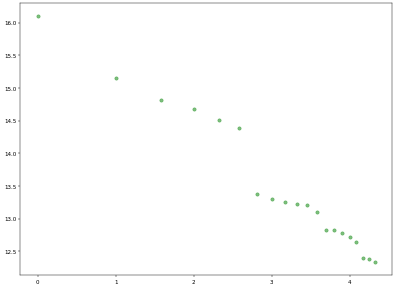

In [76]:
import matplotlib.pyplot as plt
from math import log

w = 12
h = 9
d = 40
plt.figure(figsize=(w, h), dpi=d)
plt.scatter(log_x, log_y, c="g", alpha=0.5, marker='o')
plt.show()

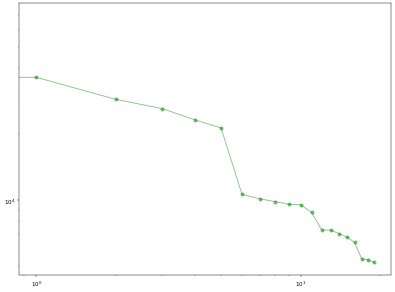

In [59]:
import matplotlib.pyplot as plt

w = 12
h = 9
d = 40
plt.figure(figsize=(w, h), dpi=d)
plt.loglog(x, y, c="g", alpha=0.5, marker='o')
plt.show()


我们可以看出，基本是一条直线。for a sufficiently large sample, the first word in that ranked list is twice as likely to occur in the corpus as the second word in the list.

## 4. Topic Modeling

#### bag of word 的缺陷

我们现在对每个document 计算一个count vector，或者normalized by the length of the document, 都只能告诉我们每个词在当前document 中是否重要(assumption: 使用频率高的词更重要)。但是我们不知道这些词在当前document 相对其他document 是否更重要。

例如，有些词可能在所有documents 中的频率都很高，这在某些场景中，这并没有提供什么信息(it doesn’t help distinguish between those
documents)。

**Inverse document frequency**, or **IDF**, is your window through Zipf in topic analysis.

In [78]:
kite_history = """Kites were invented in China, where materials ideal for kite building were readily
available: silk fabric for sail material; fine, high-tensile-strength silk for flying line;
and resilient bamboo for a strong, lightweight framework.
The kite has been claimed as the invention of the 5th-century BC Chinese
philosophers Mozi (also Mo Di) and Lu Ban (also Gongshu Ban). By 549 AD
paper kites were certainly being flown, as it was recorded that in that year a paper
kite was used as a message for a rescue mission. Ancient and medieval Chinese
sources describe kites being used for measuring distances, testing the wind, lifting
men, signaling, and communication for military operations. The earliest known
Chinese kites were flat (not bowed) and often rectangular. Later, tailless kites
incorporated a stabilizing bowline. Kites were decorated with mythological motifs
and legendary figures; some were fitted with strings and whistles to make musical
sounds while flying. From China, kites were introduced to Cambodia, Thailand,
India, Japan, Korea and the western world.
After its introduction into India, the kite further evolved into the fighter kite, known
as the patang in India, where thousands are flown every year on festivals such as
Makar Sankranti.
Kites were known throughout Polynesia, as far as New Zealand, with the
assumption being that the knowledge diffused from China along with the people.
Anthropomorphic kites made from cloth and wood were used in religious ceremonies
to send prayers to the gods. Polynesian kite traditions are used by anthropologists get
an idea of early “primitive” Asian traditions that are believed to have at one time
existed in Asia."""

In [79]:
kite_intro = wikipedia_kite.lower()
intro_tokens = tokenizer.tokenize(kite_intro)
intro_doc_length = len(intro_tokens)

kite_history = kite_history.lower()
history_tokens = tokenizer.tokenize(kite_history)
history_doc_length = len(history_tokens)

print('total tokens in introduction document: ', intro_doc_length)
print('total tokens in history document: ', history_doc_length)

total tokens in introduction document:  365
total tokens in history document:  297


#### 计算TF

下面我们看一下term frequency of “kite” in each document.

In [80]:
intro_tf = {}
history_tf = {}

intro_counts = Counter(intro_tokens)
intro_tf['kite'] = intro_counts['kite'] / intro_doc_length

history_counts = Counter(history_tokens)
history_tf['kite'] = history_counts['kite'] / history_doc_length

In [81]:
print('Term Frequency of "kite" in intro is: {:.4f}'.format(intro_tf['kite']))

Term Frequency of "kite" in intro is: 0.0438


In [82]:
print('Term Frequency of "kite" in history is: {:.4f}'.format(history_tf['kite']))

Term Frequency of "kite" in history is: 0.0202


In [83]:
intro_tf['and'] = intro_counts['and'] / intro_doc_length
history_tf['and'] = history_counts['and'] / history_doc_length

print('Term Frequency of "and" in intro is: {:.4f}'.format(intro_tf['and']))
print('Term Frequency of "and" in history is: {:.4f}'.format(history_tf['and']))

Term Frequency of "and" in intro is: 0.0274
Term Frequency of "and" in history is: 0.0303


#### 计算IDF
A term’s IDF is merely the ratio of the total number of documents to the number of documents the term appears in.

- IDF of and: 2 total documents / 2 documents contain “and” = 2/2 = 1
- IDF of kite: 2 total documents / 2 documents contain “kite” = 2/2 = 1
- IDF of China: 2 total documents / 1 document contains “China” = 2/1 = 2

首先，计算and 的idf

In [84]:
num_docs_containing_and = 0

for doc in [intro_tokens, history_tokens]:
    if 'and' in doc:
        num_docs_containing_and += 1
        
print('number of docs that contain and: ', num_docs_containing_and)

number of docs that contain and:  2


同样，计算kite 和china 的IDF

In [86]:
num_docs_containing_kite = 0 
num_docs_containing_china = 0

for doc in [intro_tokens, history_tokens]:
    if 'china' in doc:
        num_docs_containing_china += 1
    if 'kite' in doc:
        num_docs_containing_kite += 1
        
print('number of docs that contain china: ', num_docs_containing_china)
print('number of docs that contain kite: ', num_docs_containing_kite)

number of docs that contain china:  1
number of docs that contain kite:  2


In [87]:
intro_tf['china'] = intro_counts['china'] / intro_doc_length
history_tf['china'] = history_counts['china'] / history_doc_length

In [88]:
num_docs = 2
intro_idf = {}
history_idf = {}

intro_idf['and'] = num_docs / num_docs_containing_and
history_idf['and'] = num_docs / num_docs_containing_and

intro_idf['kite'] = num_docs / num_docs_containing_kite
history_idf['kite'] = num_docs / num_docs_containing_kite

intro_idf['china'] = num_docs / num_docs_containing_china
history_idf['china'] = num_docs / num_docs_containing_china

#### 计算TF-IDF

每个document，对lexicon 中的每个词，又一个TF-IDF值。
所以，每个document 有一个TF-IDF 向量，长度为lexicon 中token 的个数。

In [89]:
intro_tfidf = {}
intro_tfidf['and'] = intro_tf['and'] * intro_idf['and']
intro_tfidf['kite'] = intro_tf['kite'] * intro_idf['kite']
intro_tfidf['china'] = intro_tf['china'] * intro_idf['china']

In [90]:
intro_tfidf

{'and': 0.0273972602739726, 'kite': 0.043835616438356165, 'china': 0.0}

In [91]:
history_tfidf = {}
history_tfidf['and'] = history_tf['and'] * history_idf['and']
history_tfidf['kite'] = history_tf['kite'] * history_idf['kite']
history_tfidf['china'] = history_tf['china'] * history_idf['china']

In [92]:
history_tfidf

{'and': 0.030303030303030304,
 'kite': 0.020202020202020204,
 'china': 0.020202020202020204}

#### Zipf's Law

Zipf’s Law showed that when you compare the frequencies of two words, even if they occur a similar number of times, the more frequent word will have an exponentially higher frequency than the less frequent one.

#### Conclusion

tf-idf assigns a numeric value to the importance of that **word (t)** in the given **document (d)**, given its usage across the entire **corpus (D)**.

for a given term, t, in a given document, d, in a corpus, D, you get:
- $tf(t, d) = \frac{count(t)}{count(d)}$ 
- $idf(t, D) = log \frac{number of documents}{number of documents containing t}$ 
- $tf_idf(t, d, D) = tf(t, d) * idf(t, D)$

有时，为方便计算，我们可以对上面三个公式左右都取log：
- $log_tf(t, d) = log(count(t)) - log(count(d))$
- $log_tf(t, d) = log(log(number of documents) - log(number of documents containing t))$
- $log_tf_idf(t, d, D) = log(tf(t, d)) + log(idf(t, D))$

So,
- 一个词在一个document 中出现的越多, TF (and hence the TF-IDF) 越高. 
- 同时，这个单词在许多document 中都出现了，IDF (and hence the TF-IDF)越低.

### 4.2 Relevance Ranking

下面，我们计算每个document 的TF-IDF vector, 这个vector 可以更加全面的reflect meaning (or topic) of the document.



In [97]:
document_tfidf_vectors = []

for doc in sample_docs:
    vec = copy.copy(zero_vector)
    
    tokens = tokenizer.tokenize(doc.lower())
    token_counts = Counter(tokens)

    for key, value in token_counts.items():
        docs_containing_key = 0

        for _doc in sample_docs:
            if key in _doc:
                docs_containing_key += 1
        tf = value / len(sample_docs_lexicon)

        if docs_containing_key:
            idf = len(sample_docs) / docs_containing_key
        else:
            idf = 0

        vec[key] = tf * idf
    document_tfidf_vectors.append(vec)

In [98]:
document_tfidf_vectors

[OrderedDict([(',', 0.16666666666666666),
              ('.', 0.05555555555555555),
              ('and', 0.08333333333333333),
              ('as', 0),
              ('faster', 0.25),
              ('get', 0.16666666666666666),
              ('got', 0.16666666666666666),
              ('hairy', 0),
              ('harry', 0.0),
              ('home', 0.16666666666666666),
              ('is', 0),
              ('jill', 0),
              ('not', 0),
              ('store', 0.16666666666666666),
              ('than', 0),
              ('the', 0.5),
              ('to', 0.16666666666666666),
              ('would', 0.16666666666666666)]),
 OrderedDict([(',', 0),
              ('.', 0.05555555555555555),
              ('and', 0.08333333333333333),
              ('as', 0),
              ('faster', 0.08333333333333333),
              ('get', 0),
              ('got', 0),
              ('hairy', 0.08333333333333333),
              ('harry', 0.0),
              ('home', 0),
              ('i

每个document 是一个 K-dimensional vector，在上面的例子里，K=18.然后我们可以根据vector 的cos distance来计算两个documents 的相似度。

下面，我们可以做一个简单的基于TF-IDF 的search. The objective is to find the documents whose vectors have the highest cosine similarities to the query and return those as the search results.

In [99]:
query = "How long does it take to get to the store?"
query_vec = copy.copy(zero_vector)

In [100]:
tokens = tokenizer.tokenize(query.lower())
token_counts = Counter(tokens)
token_counts

Counter({'how': 1,
         'long': 1,
         'does': 1,
         'it': 1,
         'take': 1,
         'to': 2,
         'get': 1,
         'the': 1,
         'store': 1,
         '?': 1})

In [103]:
for key, value in token_counts.items():
    docs_containing_key = 0
    
    for _doc in sample_docs:
        if key in _doc.lower():
            docs_containing_key += 1
        
    # dropped the keys that weren’t found in the lexicon to avoid a divide-by-zero error
    if docs_containing_key == 0:
        continue
            
    tf = value / len(tokens)
    idf = len(sample_docs) / docs_containing_key
    query_vec[key] = tf * idf

In [104]:
cosine_sim(query_vec, document_tfidf_vectors[0])

0.6132857433407973

In [105]:
cosine_sim(query_vec, document_tfidf_vectors[1])

0.0

In [106]:
cosine_sim(query_vec, document_tfidf_vectors[2])

0.0

从上面的结果可以看出，document 0 has the most relevance for your query.

上面，我们对没有见过的token 直接丢掉，为了防止divide-by-zero 问题。更好的方法是使用add-one smoothing (laplace smoothing). 对每个被除数+1. 通过使用这个方法，通常能提高keyword based 搜索的准确率。

#### chatbot based on keyword-based search engine:
- store your training data in pairs of questions (or statements) and appropriate responses. 
- use TF-IDF to search for a question (or statement) most like the user input text.
- return the response associated with that statement

## 5. Tools

之前我们都是用自己写的函数来计算TF-IDF，后面我们用python 库来计算。



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = docs
print(corpus)

vectorizer = TfidfVectorizer(min_df=1)
model = vectorizer.fit_transform(corpus)

print(model.todense().round(2))

`TFIDFVectorizer` model 会生成一个sparse numpy matrix, 因为许多documents 实际上只用了词汇表(lexicon)中很少的一部分词。
The `.todense()` method converts a sparse matrix back into a regular numpy matrix (filling in the
gaps with zeros) for your **viewing pleasure**.

生成一个TF-IDF matrices，每一行是一个document，每一列是一个token.

### Alternatives

to improve the relevance of search, 有很多研究工作在于如何优化IDF part.

Search engines (information retrieval systems) match keywords (terms) between queries and documents in a corpus. If you’re building a search engine and want to provide documents that are likely to match what your users are looking for, you should spend some time investigating the alternatives.

#### Okapi BM25

- ignore duplicate terms (tf 最高为1)
- choosing the weighting scheme

## Summary

本节我们介绍了keyword based search。下一章，我们介绍semantic search engine. 

semantic search 的一个问题是：Semantic word and topic vectors don’t scale to billions of documents. 当你的corpus 太大的时候，例如google，bing等web search engine，更多使用keyword search.

TF-IDF vector 是我们pipeline 的第一步，下一步我们介绍，如何通过TF-IDF vector 计算topic vector。

本章我们介绍了：
- Any web-scale search engine with millisecond response times has the power of a TF-IDF term document matrix hidden under the hood.
- Term frequencies must be weighted by their inverse document frequency to ensure the most important, most meaningful words are given the heft they deserve.
- Zipf’s law can help you predict the frequencies of all sorts of things, including words, characters, and people.
- The rows of a TF-IDF term document matrix can be used as a vector representation of the meanings of those individual words to create a vector space model of word semantics.
- Euclidean distance and similarity between pairs of high dimensional vectors doesn’t adequately represent their similarity for most NLP applications.
- Cosine distance, the amount of “overlap” between vectors, can be calculated efficiently by just multiplying the elements of normalized vectors together and summing up those products.
- Cosine distance is the go-to similarity score for most natural language vector representations.